In [1]:
#1. Data Exploration:

In [2]:
#a. Load the dataset and perform EDA:-
#Import libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,RocCurveDisplay

In [4]:
#Load the dataset:-

In [5]:
train_df = pd.read_csv(r"C:\Users\GURU\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\GURU\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
#Check basic info:

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
#Check for missing values:

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
#View first few rows:

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
#b. Examine features and summary statistics:

In [20]:
#Feature types and descriptions:

In [21]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [22]:
#Identify numeric and categorical features:

In [23]:
numerical_features = train_df.select_dtypes(include = ['int64','float64']).columns
print("Numerical Features :",numerical_features)

Numerical Features : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [24]:
categorical_features = train_df.select_dtypes(include=['object']).columns
print("Categorical Features :",categorical_features) 

Categorical Features : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [25]:
#c. Visualizations:

In [26]:
#Histogram of age distribution:

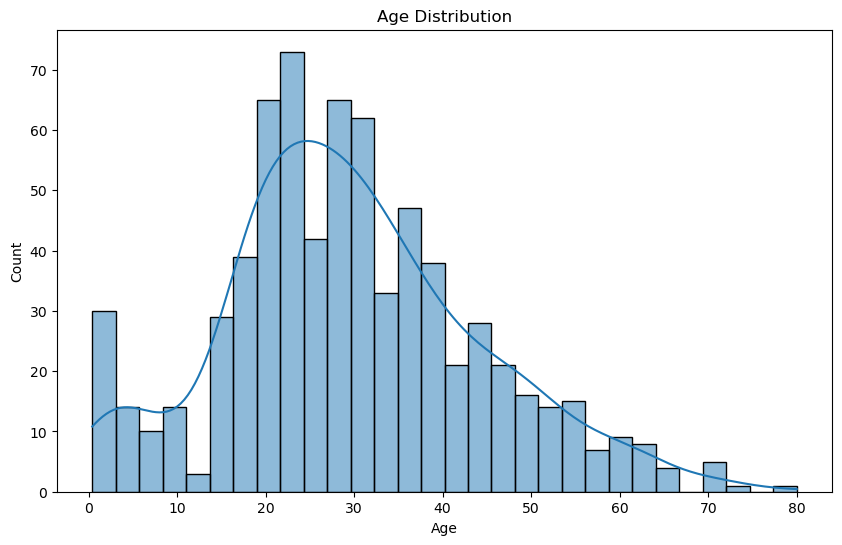

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

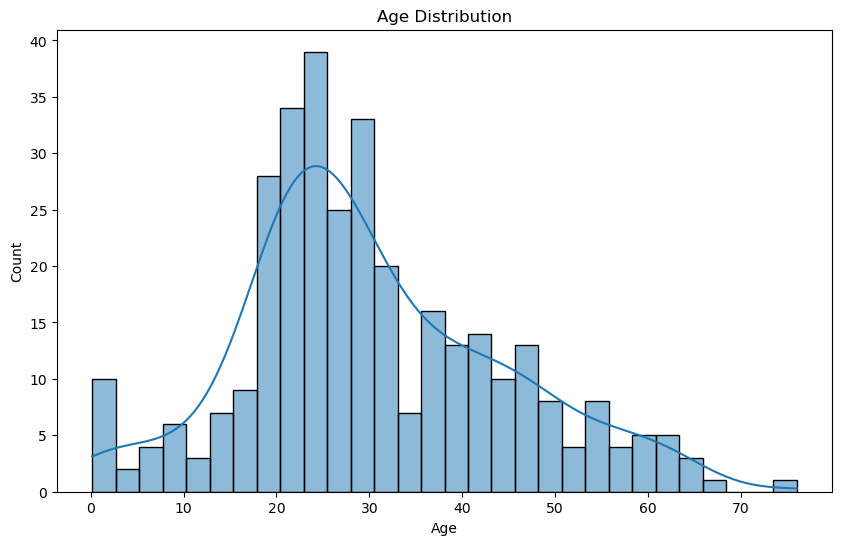

In [28]:
plt.figure(figsize = (10, 6))
sns.histplot(test_df['Age'],bins = 30 , kde = True)
plt.title('Age Distribution')
plt.show()

In [29]:
#Box plot for age by passenger class:

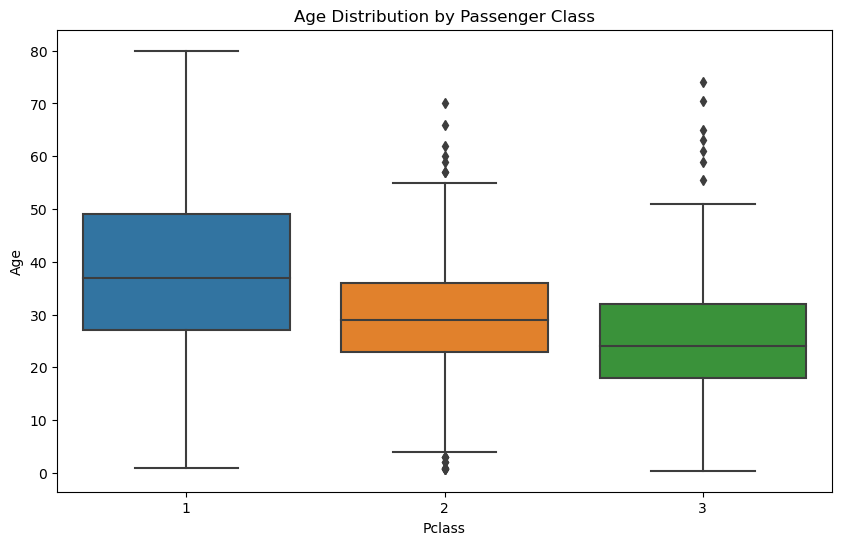

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass',y='Age',data=train_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

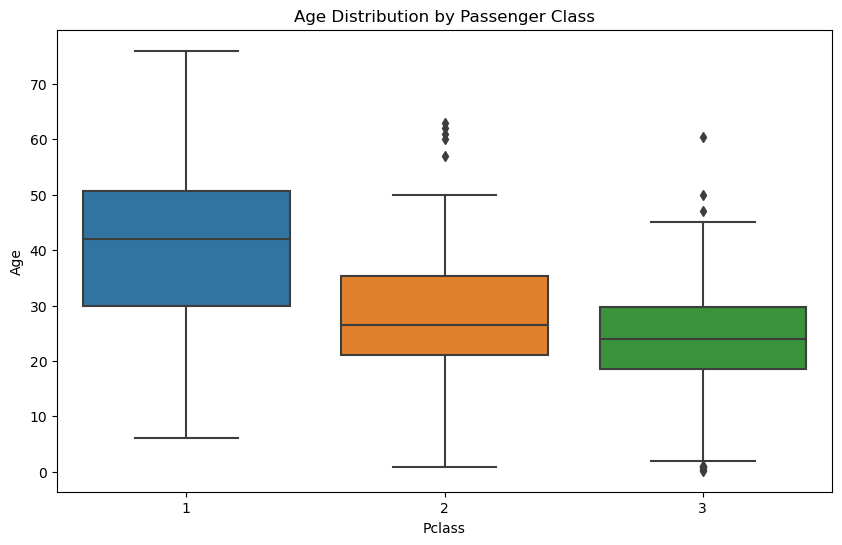

In [31]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = test_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

In [32]:
#Correlation heatmap:

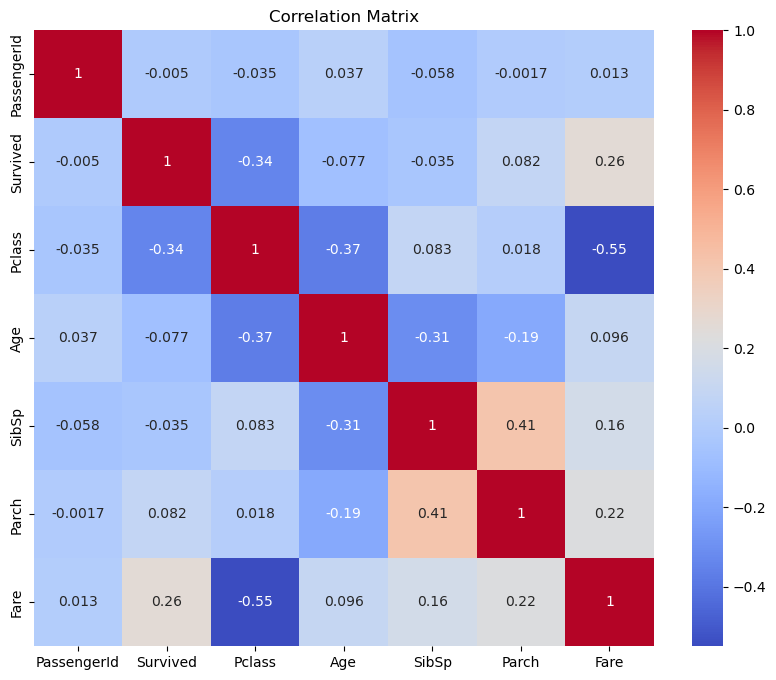

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

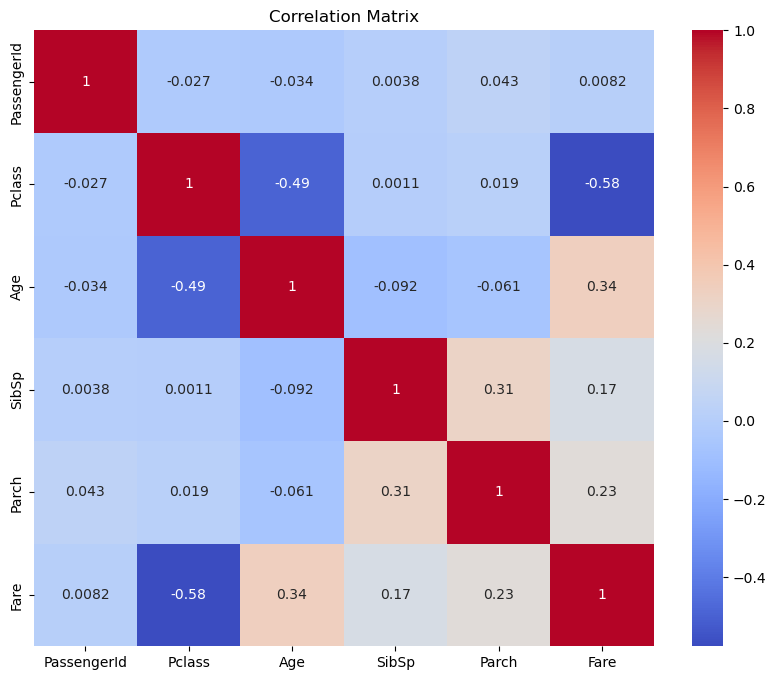

In [34]:
plt.figure(figsize = (10, 8))
sns.heatmap(test_df.select_dtypes(include = ['number']).corr(),annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
#Survival count plot:

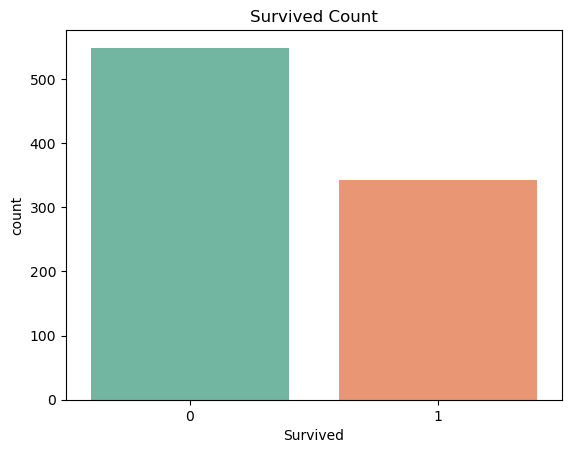

In [36]:
sns.countplot(x='Survived',data=train_df,palette='Set2')
plt.title("Survived Count")
plt.show()

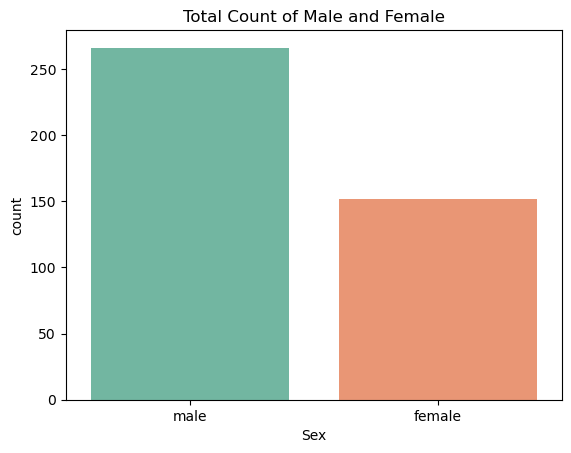

In [37]:
sns.countplot(x = 'Sex' , data = test_df , palette = 'Set2')
plt.title('Total Count of Male and Female')
plt.show()

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


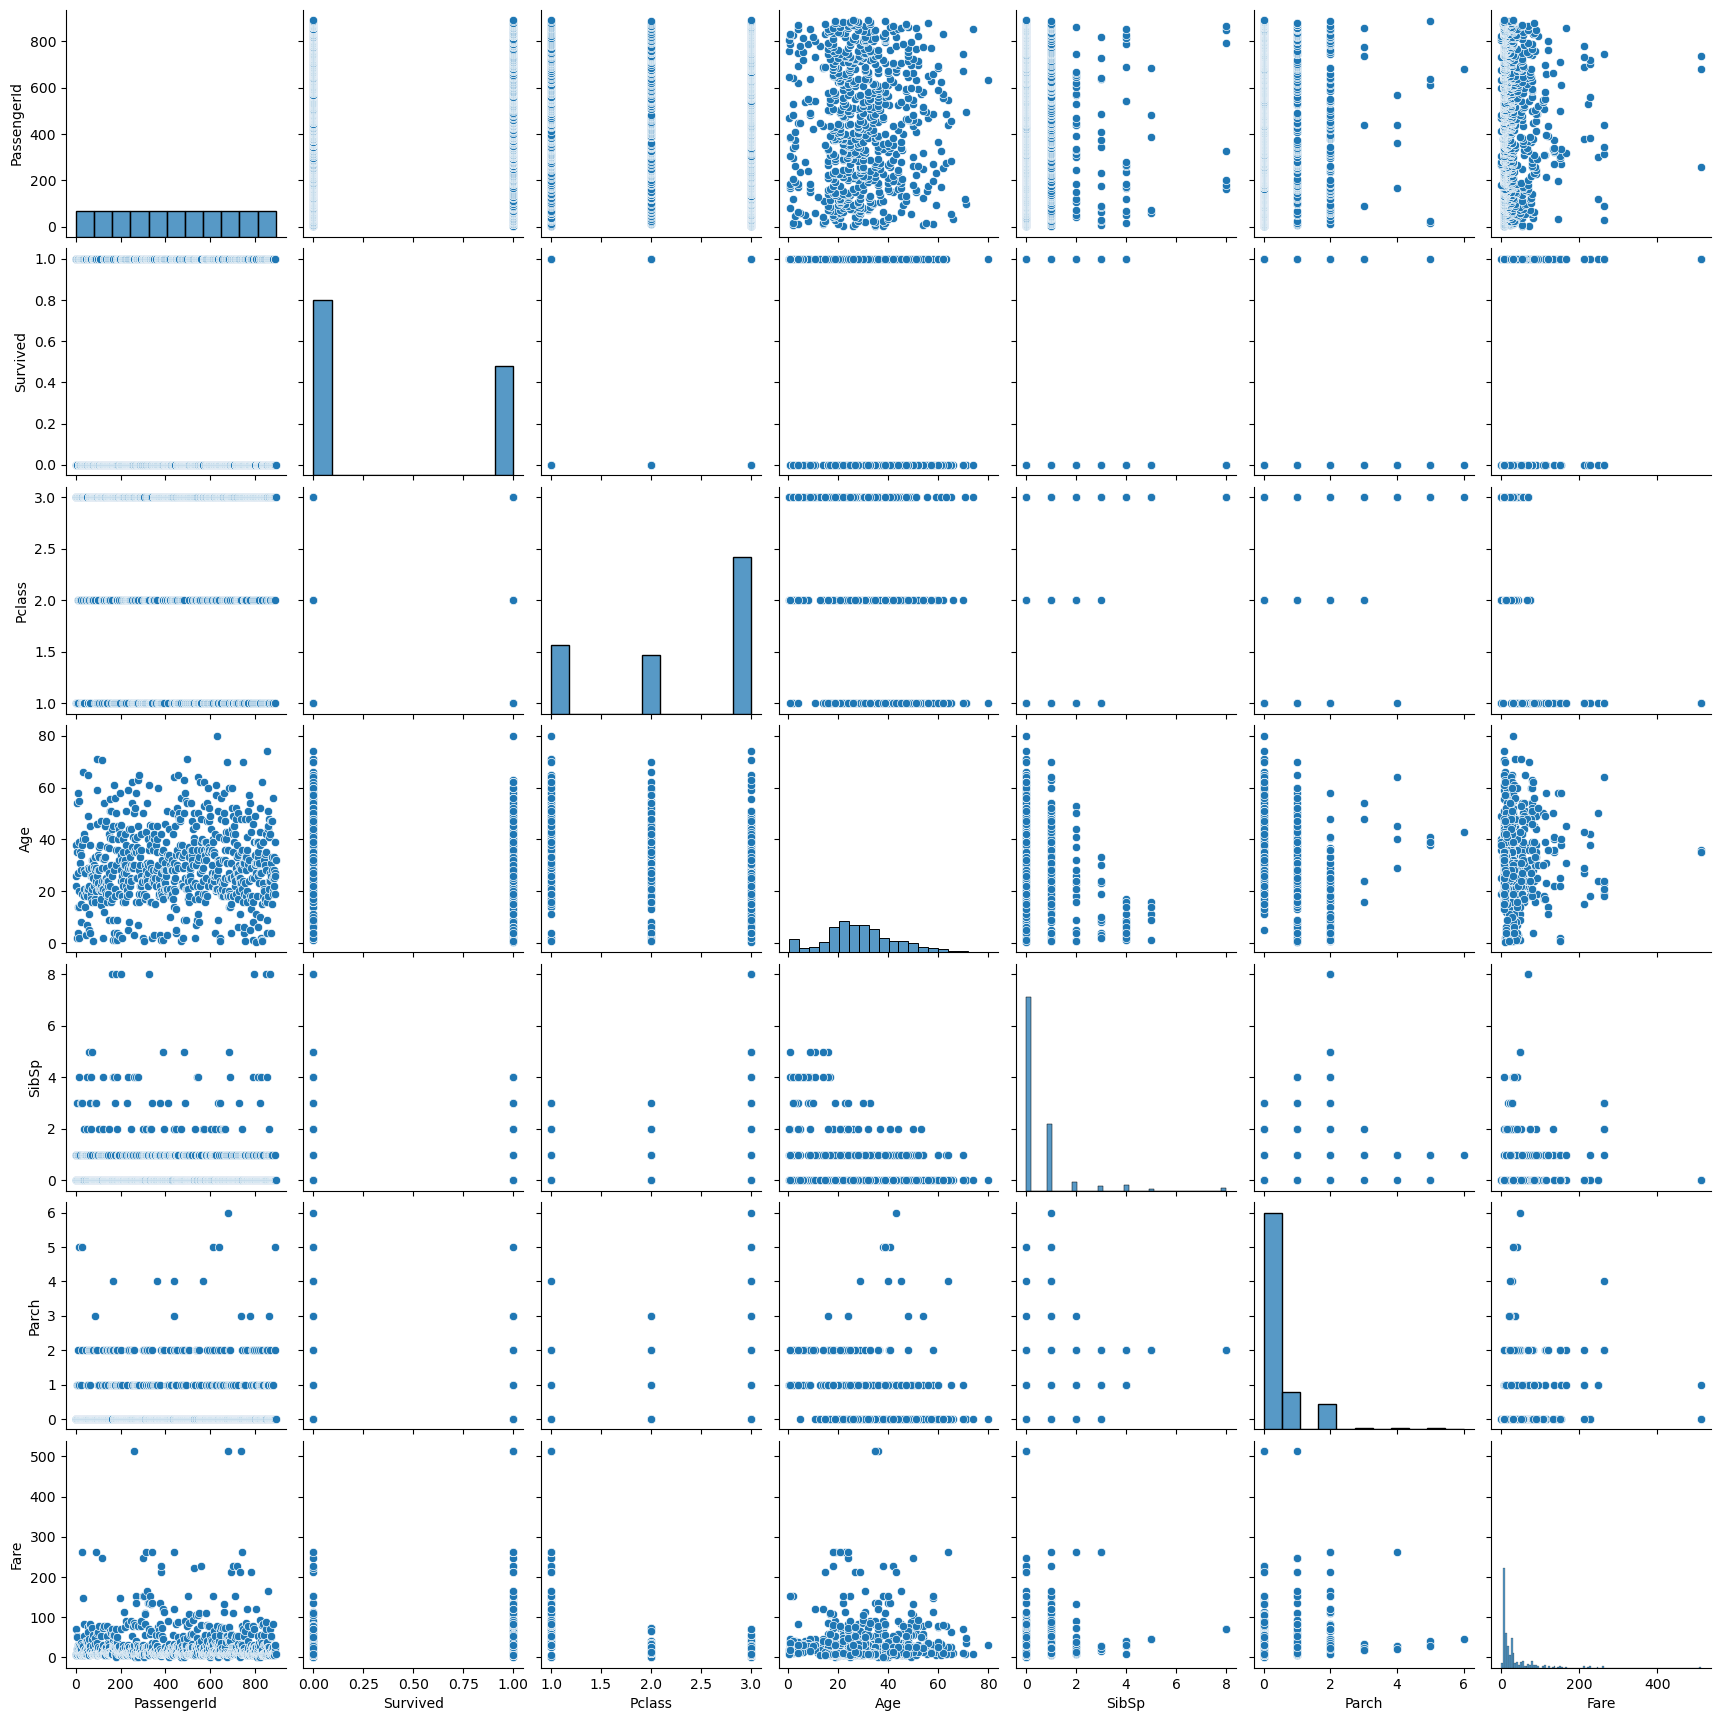

In [38]:
sns.pairplot(train_df)
plt.show()

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


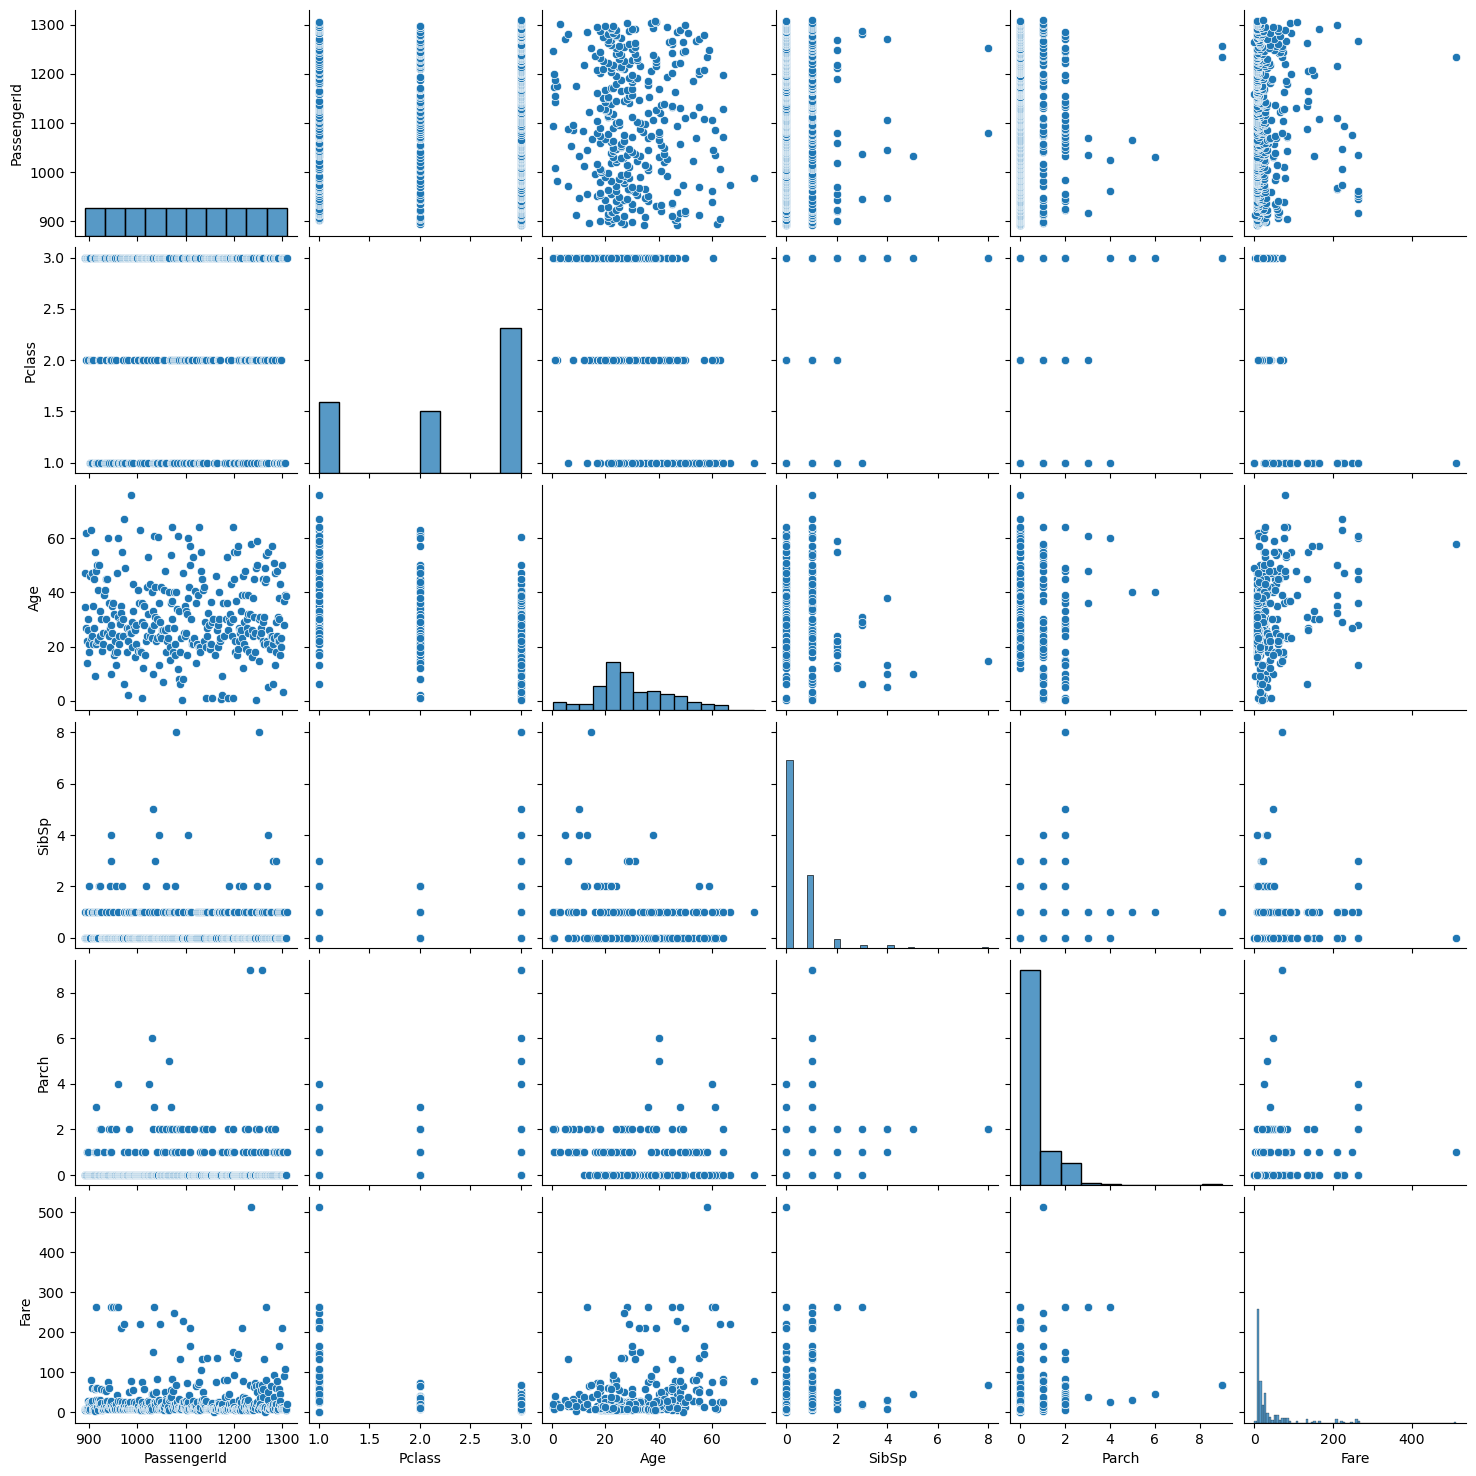

In [39]:
sns.pairplot(test_df)
plt.show()

In [40]:
#2. Data Preprocessing:

In [41]:
#a. Handle missing values:
#Impute missing values:

In [42]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [43]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

In [44]:
#b. Encode categorical variables:
#Convert categorical variables to numeric:

In [45]:
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [46]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2})
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [47]:
#3. Model Building:

In [48]:
#a. Build logistic regression model:
#Select features and target:

In [49]:
features = ['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']
X = train_df[features]
y = train_df['Survived']

In [50]:
X_train , X_val ,y_train,y_val = train_test_split(X,y,  test_size=0.2, random_state=42)

In [51]:
#Train logistic regression model:

In [52]:
model = LogisticRegression(max_iter= 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
#b. Make predictions:

In [54]:
#Predict on test set:

In [55]:
y_pred = model.predict(X_val)

In [56]:
#4. Model Evaluation:

In [57]:
#a. Evaluate model performance:
#Import evaluation metrics:

In [58]:
#Calculate metrics:

In [59]:
print("Accuracy :",accuracy_score(y_val,y_pred))
print("Precision :",precision_score(y_val,y_pred))
print("Recall :", recall_score(y_val,y_pred))
print("f1 score :",f1_score(y_val,y_pred))
print("roc auc score :",roc_auc_score(y_val,model.predict_proba(X_val)[:,1]))

Accuracy : 0.7988826815642458
Precision : 0.7714285714285715
Recall : 0.7297297297297297
f1 score : 0.75
roc auc score : 0.8808236808236808


In [60]:
#b. Visualize ROC curve:

In [61]:
#ROC curve plot:

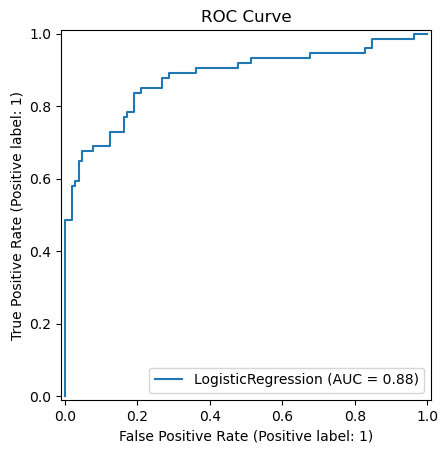

In [62]:
RocCurveDisplay.from_estimator(model, X_val, y_val)
plt.title("ROC Curve")
plt.show()

In [63]:
#5. Interpretation:

In [64]:
#a. Interpret coefficients:
#Get feature importance:

In [65]:
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
1       Sex     2.581498
6  Embarked     0.222522
5      Fare     0.002863
2       Age    -0.031163
4     Parch    -0.100657
3     SibSp    -0.302825
0    Pclass    -0.958073
